# **Image Segmentation using CNN and Canny Edge Detection**

# **Vijay Varma -- Tested the CNN Model with various architectures and Implemented the Model and Inference in TensorFlow along with the other helper functions(convert_to_segmentation, segment_img, Saving, Loading Model).**
# **Rohit -- Collected Dataset and wrote helper functions Canny Edges and Apply Color**

In [ ]:
#### Importing Required Libraries
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

# **Dataset**

In [ ]:
!sudo apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!mkdir CorelDB

In [ ]:
!cp CorelDB.* CorelDB/

In [ ]:
!cd Core1DB; 7za x CorelDB.7z.001

/bin/bash: line 0: cd: Core1DB: No such file or directory

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 5061333 bytes (4943 KiB)

Extracting archive: CorelDB.7z.001
  0% 1 Open           --
Path = CorelDB.7z.001
Type = Split
Physical Size = 5061333
Volumes = 7
Total Physical Size = 34129942
----
Path = CorelDB.7z
Size = 34129942
--
Path = CorelDB.7z
Type = 7z
Physical Size = 34129942
Headers Size = 72087
Method = LZMA:16
Solid = +
Blocks = 5

  0%      5% 579 - CorelDB/wl_wolf/110079.jpg                                      10% 1143 - CorelDB/wl_lepoad/134054.jpg                                        

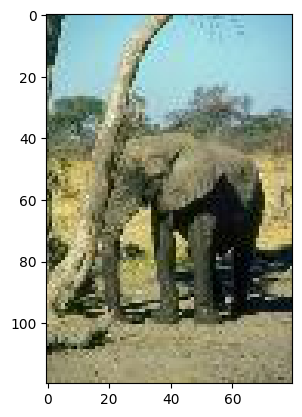

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/CorelDB/wl_elephant/107000.jpg'))
plt.show()

In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio("CorelDB", output="corel_data", seed=1337, ratio=(.7, 0, .3), group_prefix=None, move=False) # default values

Copying files: 10814 files [00:01, 6285.92 files/s]


# **Creating New Dataset with only objects Classes(Total 21 Classes)**




In [ ]:
!mkdir new_data

In [ ]:
!cd new_data; mkdir train test

In [ ]:
!cd new_data; ls

test  train


In [ ]:
!cp -r corel_data/train/obj* new_data/train

In [ ]:
!cp -r corel_data/test/obj* new_data/test

In [ ]:
train_it = datagen.flow_from_directory('new_data/train/', class_mode='sparse',batch_size=4,target_size=(80, 120))
test_it = datagen.flow_from_directory('new_data/test/', class_mode='sparse',batch_size=4,shuffle=False,target_size=(80, 120))

batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 1904 images belonging to 21 classes.
Found 816 images belonging to 21 classes.
Batch shape=(1, 80, 120, 3), min=0.000, max=249.000


# **Training the Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(84,124,interpolation='bilinear',crop_to_aspect_ratio=False),
    tf.keras.layers.DepthwiseConv2D((5,5),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Resizing(84,124,interpolation='bilinear',crop_to_aspect_ratio=False),
    tf.keras.layers.DepthwiseConv2D((5,5),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Resizing(84,124,interpolation='bilinear',crop_to_aspect_ratio=False),
    tf.keras.layers.DepthwiseConv2D((5,5),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(21)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
h = 0
with tf.device('/GPU:0'):
  h = model.fit_generator(train_it, steps_per_epoch=None,epochs=20)

<ipython-input-20-c7e57df6cabe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(train_it, steps_per_epoch=None,epochs=20)


Epoch 1/20
1904/1904 [==============================] - 13s 5ms/step - loss: 2.5485 - accuracy: 0.2563
Epoch 2/20
1904/1904 [==============================] - 8s 4ms/step - loss: 1.5405 - accuracy: 0.5446
Epoch 3/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.8903 - accuracy: 0.7489
Epoch 4/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.4661 - accuracy: 0.8692
Epoch 5/20
1904/1904 [==============================] - 8s 4ms/step - loss: 0.2540 - accuracy: 0.9359
Epoch 6/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.1877 - accuracy: 0.9506
Epoch 7/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.1953 - accuracy: 0.9559
Epoch 8/20
1904/1904 [==============================] - 10s 5ms/step - loss: 0.1294 - accuracy: 0.9669
Epoch 9/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.1237 - accuracy: 0.9737
Epoch 10/20
1904/1904 [==============================] - 9s 5ms/step - loss: 0.0

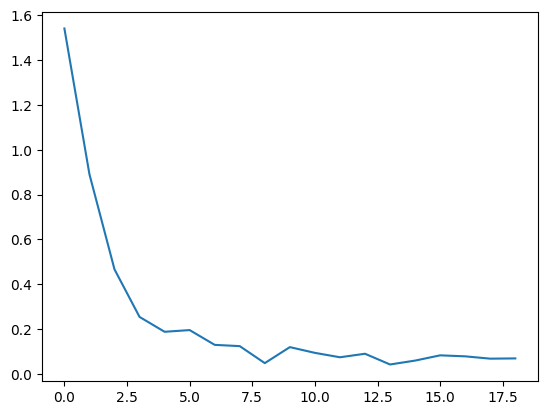

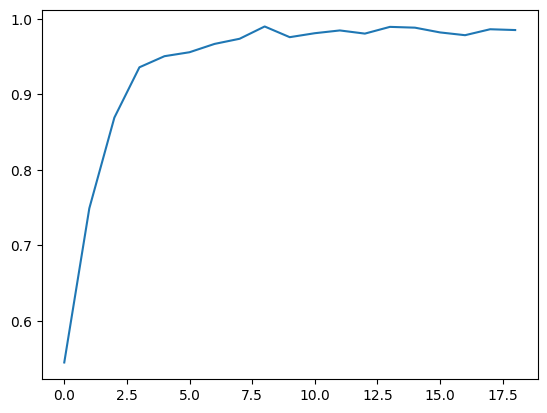

In [ ]:
#### Displaying the Plots

plt.plot(h.history['loss'][1:])
plt.show()
plt.plot(h.history['accuracy'][1:])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 84, 124, None)     0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 80, 120, 3)       78        
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 60, 3)        0         
 )                                                               
                                                                 
 resizing_1 (Resizing)       (None, 84, 124, 3)        0         
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 80, 120, 3)       78        
 seConv2D)                                                       
                                                        

# Edge Detection, Erosion and Dilation

In [ ]:
# Results
# /content/new_data/test/obj_bob/412012.jpg
# /content/new_data/test/obj_balloon/329031.jpg
# /content/new_data/test/obj_aviation/360002.jpg
# /content/new_data/test/obj_aviation/360039.jpg
# /content/new_data/test/obj_car/29008.jpg

In [ ]:
def canny_edges(img):
  t_lower = 50 # Lower Threshold
  t_upper = 150 # Upper threshold
  img1 = cv2.Canny(img[:,:,0],t_lower,t_upper)
  img2 = cv2.Canny(img[:,:,1],t_lower,t_upper)
  img3 = cv2.Canny(img[:,:,2],t_lower,t_upper)
  img_final = img1^img2^img3
  return img_final

def convert_to_segmentation(img,model):
    feature_extractor = tf.keras.Model(
        inputs=model.inputs,
        outputs=[
                model.output,  # < last layer output 
                model.layers[1].output # < your convolution layer output 
        ]
    )

    x = np.expand_dims(img,axis=0)
    y, conv_y = feature_extractor(x)
    p = conv_y[0,:,:,:].numpy().astype(np.uint8)
    edge_map = canny_edges(p)
    kernel = np.ones((3,3), np.uint8)
    kernel2 = np.ones((2,2), np.uint8)

    img_dilation = cv2.dilate(edge_map, kernel, iterations=2)
    img_erosion = 255-cv2.erode(255-img_dilation, kernel2, iterations=2)

    return img_erosion

def apply_color(orig_img,seg_img):
    temp = tf.image.resize(orig_img,(80,120)).numpy().astype(np.uint8)
    color = np.array([255,0,0], dtype='uint8')
    masked_img = np.where(seg_img[...,None], color, temp)
    seg_color_img = cv2.addWeighted(temp, 0.5, masked_img, 0.5, 0)
    return seg_color_img

def segment_image(img,model):
    segmented_img = convert_to_segmentation(orig_img,new_model)
    seg_color_img = apply_color(img,segmented_img)
    return seg_color_img

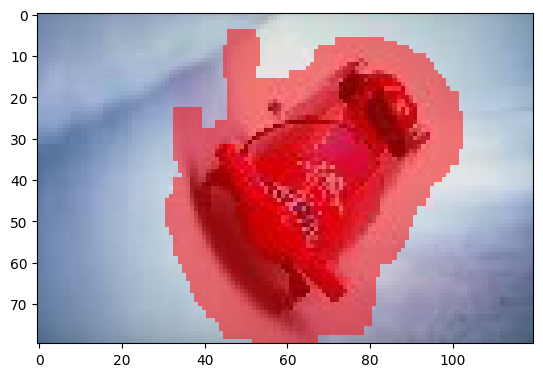

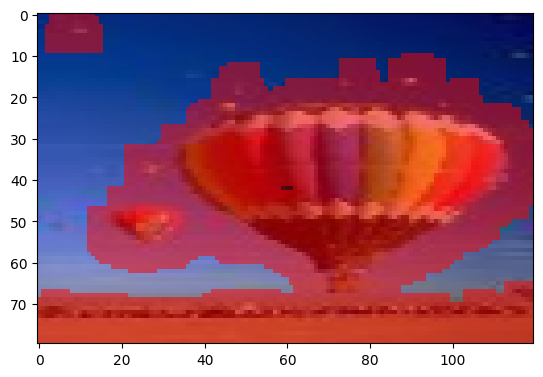

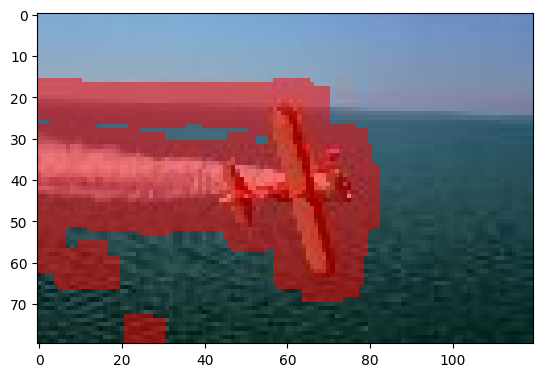

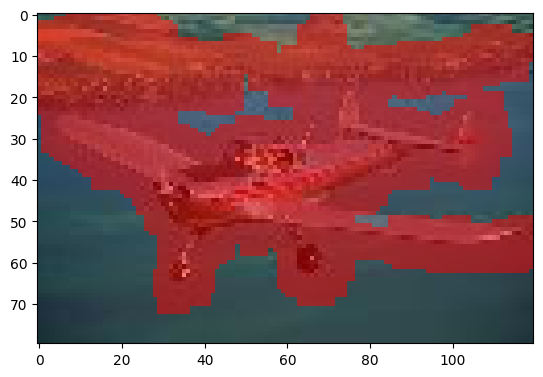

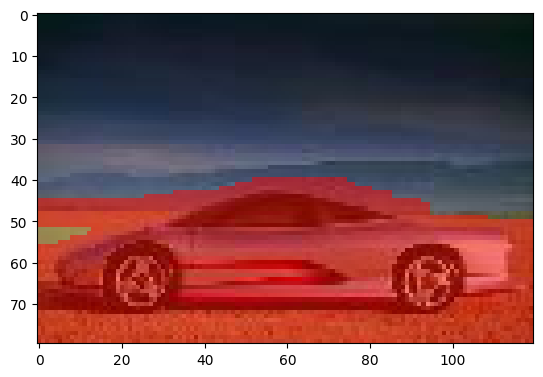

In [ ]:
i = 0
for img_path in ['/content/new_data/test/obj_bob/412012.jpg','/content/new_data/test/obj_balloon/329031.jpg','/content/new_data/test/obj_aviation/360002.jpg','/content/new_data/test/obj_aviation/360039.jpg','/content/new_data/test/obj_car/29008.jpg']:
    i += 1
    orig_img = plt.imread(img_path)
    seg_img = segment_image(orig_img,model)
    plt.imsave('CNN Img {}.jpeg'.format(i),seg_img)
    plt.imshow(seg_img)
    plt.show()

# Saving and Loading rhe Model

In [ ]:
model.save('saved_model/my_model')

In [ ]:
!zip -r fullmodel.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 91%)
  adding: saved_model/my_model/assets/ (stored 0%)
  adding: saved_model/my_model/saved_model.pb (deflated 90%)
  adding: saved_model/my_model/fingerprint.pb (stored 0%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.index (deflated 63%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 21%)


In [ ]:
!unzip fullmodel.zip -d out2/

Archive:  fullmodel.zip
   creating: out2/saved_model/
   creating: out2/saved_model/my_model/
  inflating: out2/saved_model/my_model/keras_metadata.pb  
   creating: out2/saved_model/my_model/assets/
  inflating: out2/saved_model/my_model/saved_model.pb  
 extracting: out2/saved_model/my_model/fingerprint.pb  
   creating: out2/saved_model/my_model/variables/
  inflating: out2/saved_model/my_model/variables/variables.index  
  inflating: out2/saved_model/my_model/variables/variables.data-00000-of-00001  


In [ ]:
new_model = tf.keras.models.load_model('out2/saved_model/my_model')

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 84, 124, None)     0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 80, 120, 3)       78        
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 60, 3)        0         
 )                                                               
                                                                 
 resizing_1 (Resizing)       (None, 84, 124, 3)        0         
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 80, 120, 3)       78        
 seConv2D)                                                       
                                                        